# Evaluating a model

## 1. Divide the dataset into `Train set` and `Test set`


```
----------------------------------------------------------
|                       (X, y)                           |
----------------------------------------------------------
                           |
                   train_test_split(X, y)
                           |
                          
----------------------------------------------------------
|          (X_train, y_train)         | (X_test, y_test) |
----------------------------------------------------------
          (80%)                             (20%)
           /                                   \
          /                                     \

    model.fit(X_train, y_train)            model.score(X_test, y_test)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Dataset

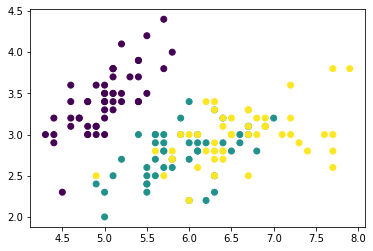

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

# plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y)

### Split the dataset into Train set and Test set

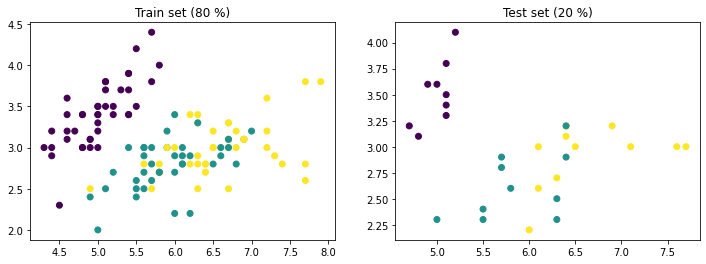

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# plot Train-set and Test-set
plt.figure(figsize=(12, 4))

# plot Train-set
plt.subplot(121)
train_size = len(y_train) / len(y) * 100
plt.title("Train set (%d %%)" % train_size)
_ = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

# plot Test-set
plt.subplot(122)
test_size = len(y_test) / len(y) * 100
plt.title("Test set (%d %%)" % test_size)
_ = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

### Apply this on a model

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Create a classification model
model = KNeighborsClassifier(n_neighbors=1)

# Training the model on the data (X_train, y_train)
model.fit(X_train, y_train)

# Evaluate the model 
# Train score / evaluate the model with train set
train_score = model.score(X_train, y_train)
print("Train score: ", train_score)

# Test score / evaluate the model with test set
test_score = model.score(X_test, y_test)
print("Test score: ", test_score)

Train score:  1.0
Test score:  0.9333333333333333


## 2. Cross validation

### $-$ La fonction `model_selection.cross_val_score()`

In [42]:
from sklearn.model_selection import cross_val_score

# Create a classification model
model = KNeighborsClassifier(n_neighbors=1)

# cross validation
cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()

0.9583333333333334

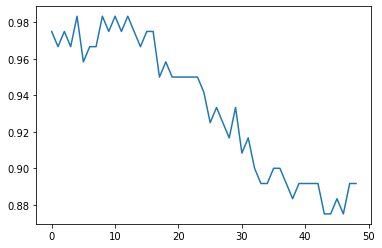

In [46]:
# Evaluate the model with `cross validation` and number of neighbors
val_score = []
for k in range(1, 50):
    # Create a classification model with k neighbors
    model = KNeighborsClassifier(n_neighbors=k)
    # cross validation
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    val_score.append(score)

# plot result
plt.plot(val_score)